In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import os

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from    datetime                 import   datetime
from    pandas                   import   read_csv, Grouper, DataFrame, concat
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF

from   IPython.display                 import display
from   pylab                           import rcParams
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error


1. Read the data as an appropriate Time Series data and plot the data.


In [2]:
df_1 = pd.read_csv("Sparkling.csv", parse_dates = ['YearMonth'])

In [3]:
df_1.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [4]:
df_1.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [5]:
df_1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df_1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


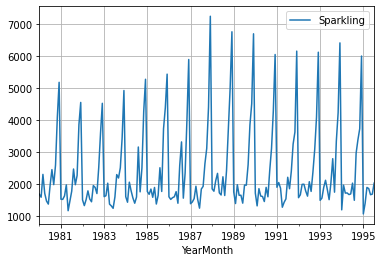

In [6]:
#Plot the time series
df_1.plot()
plt.grid()

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [8]:
df_1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


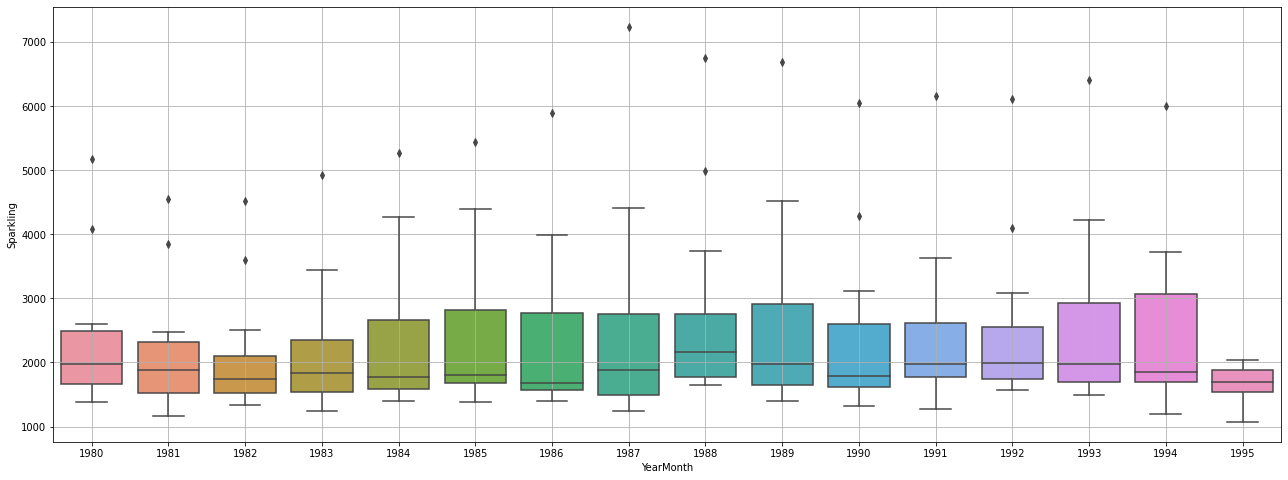

In [9]:
#Plot a year on year boxplot for the wine sales.
fig, ax = plt.subplots(figsize=(22,8))

sns.boxplot(x = df_1.index.year,y = df_1['Sparkling'])
plt.grid();

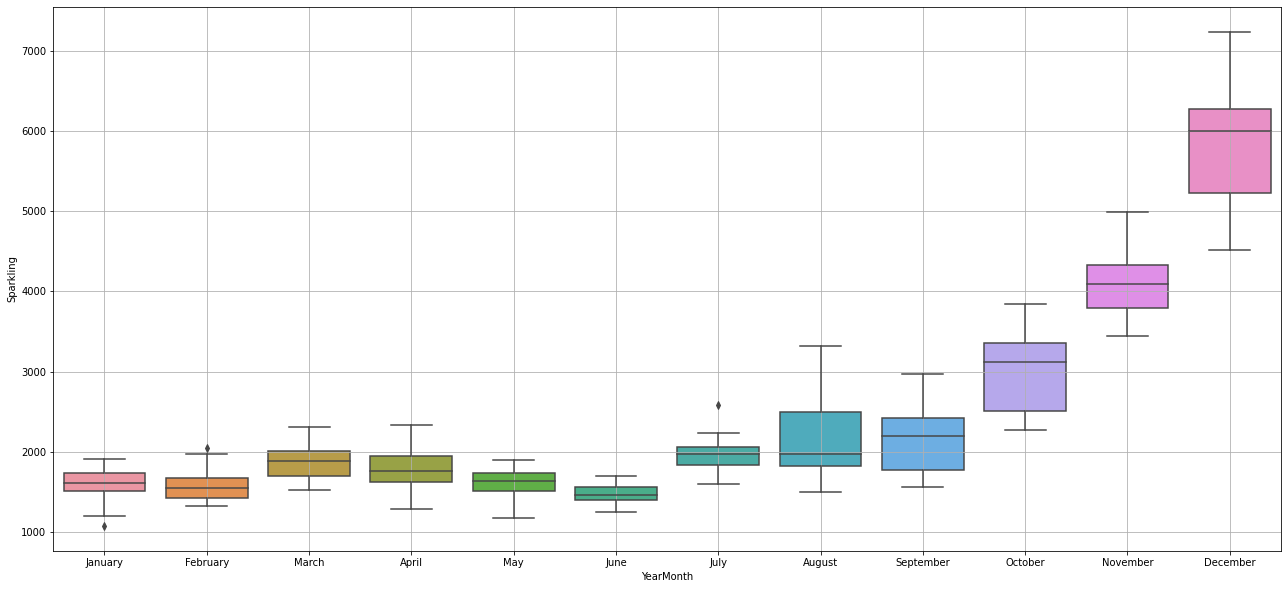

In [10]:
#Plot a monthly boxplot for the wine sales taking all the years into account.


fig, ax = plt.subplots(figsize=(22,10))

sns.boxplot(x = df_1.index.month_name(),y = df_1['Sparkling'])
plt.grid();

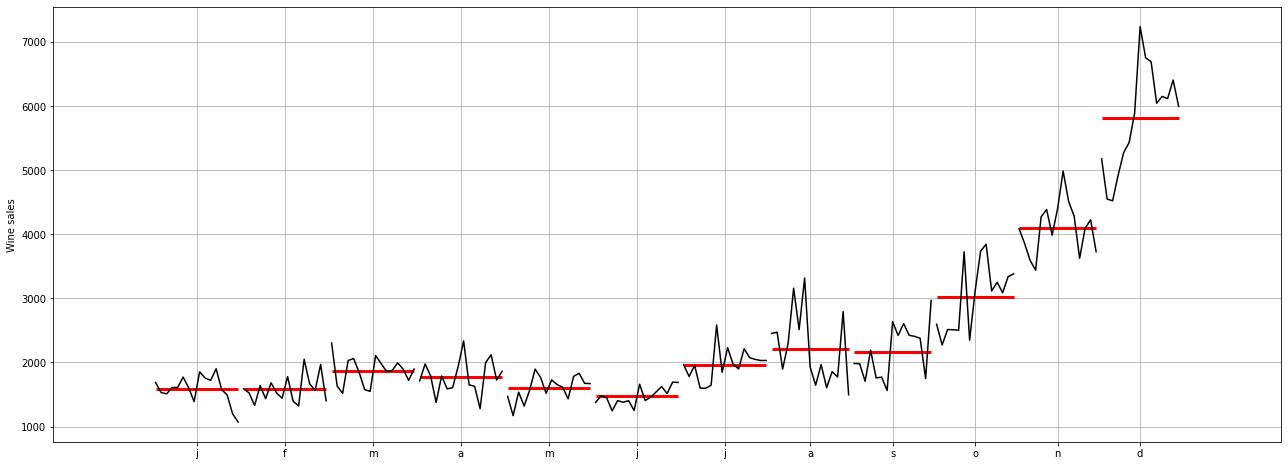

In [11]:
#Plot a monthplot of the give Time Series.

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine sales',ax=ax)
plt.grid();

In [12]:
#Plot a graph of monthly RetailSales across years.

monthly_sales_across_years = pd.pivot_table(df_1, values = 'Sparkling', columns = df_1.index.month, index = df_1.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


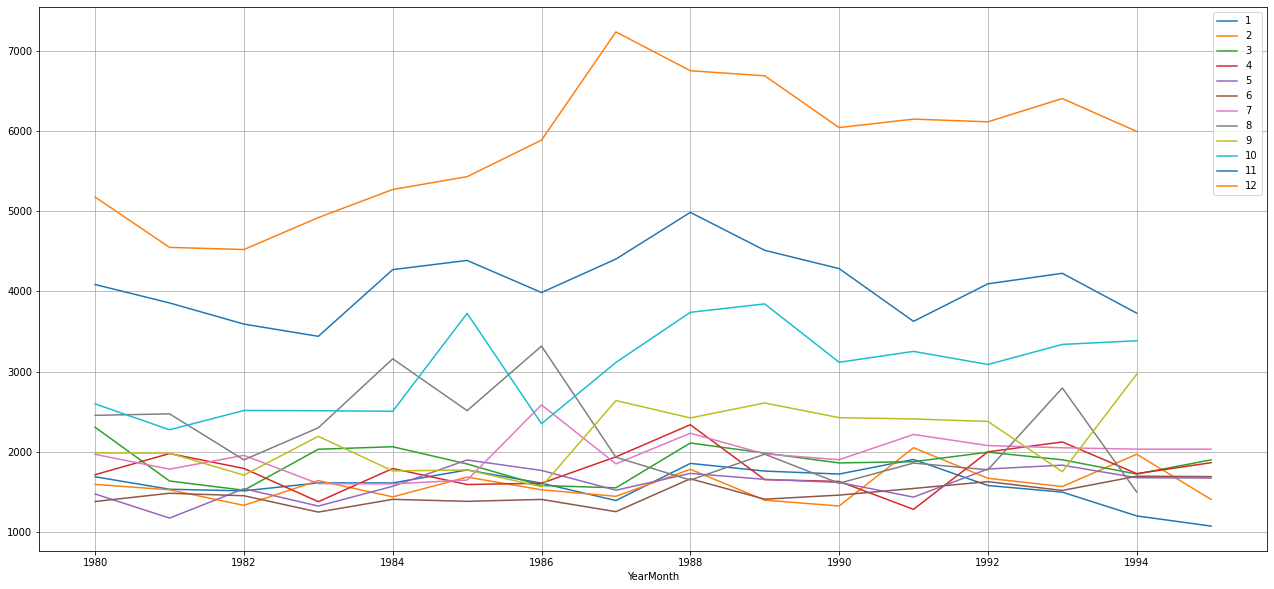

In [13]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sales_across_years.plot(ax=ax)
plt.grid()
plt.legend(loc='best');


In [14]:
#Decompose the Time Series and plot the different components.
from    statsmodels.tsa.seasonal import   seasonal_decompose

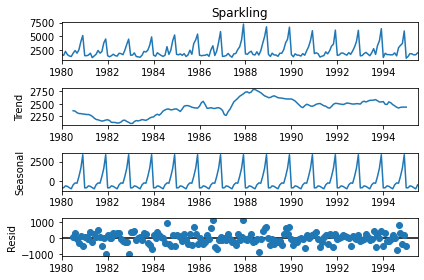

In [15]:
#Additive Decomposition

decomposition = seasonal_decompose(df_1['Sparkling'],model='additive')
decomposition.plot();

In [16]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [17]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


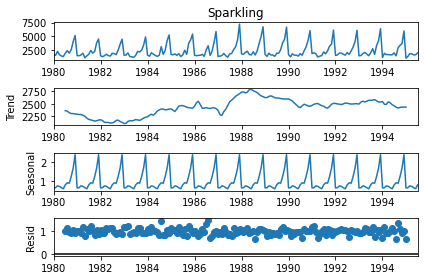

In [18]:
#Multiplicative Decomposition

decomposition = seasonal_decompose(df_1['Sparkling'],model='multiplicative')
decomposition.plot();

In [19]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

3.Split the data into training and test. The test data should start in 1991.


In [20]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [21]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


In [24]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [25]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   134
1991-02-01       2049   135
1991-03-01       1874   136
1991-04-01       1279   137
1991-05-01       1432   138 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   184
1995-04-01       1862   185
1995-05-01       1670   186
1995-06-01       1688   187
1995-07-01       2031   188 



In [26]:
lr = LinearRegression()

In [27]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

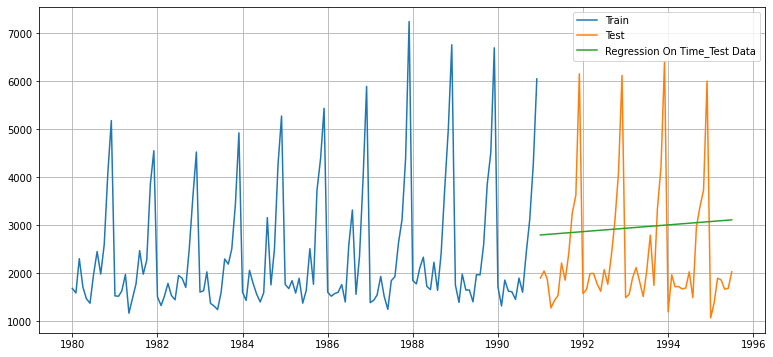

In [28]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [29]:
## Test Data - RMSE
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1391.455


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758


In [31]:
#Naive Approach
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [32]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

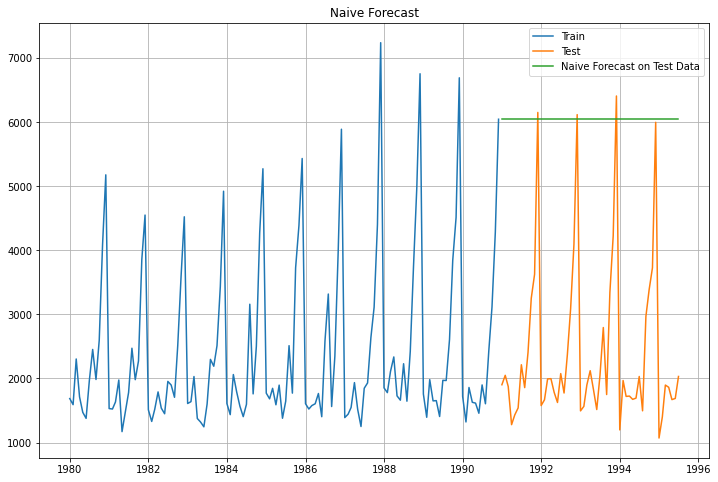

In [33]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [34]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [35]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352


In [36]:
#Simple Average

SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [37]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


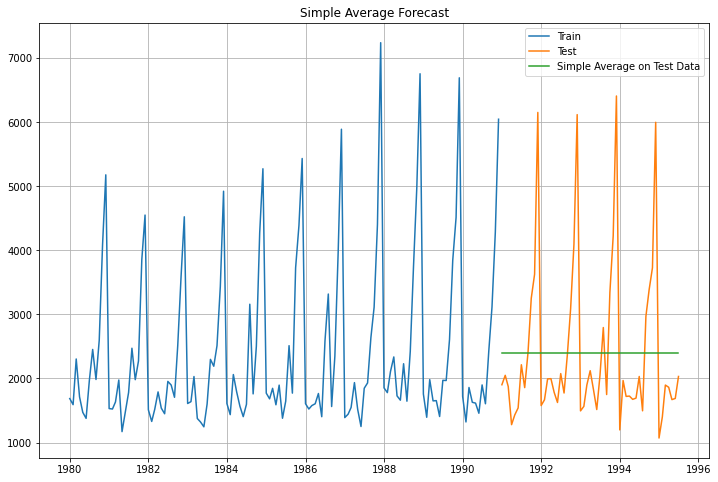

In [38]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [39]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [40]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


In [41]:
#Moving Average(MA)
MovingAverage = df_1.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [42]:
#Trailing Moving Average
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


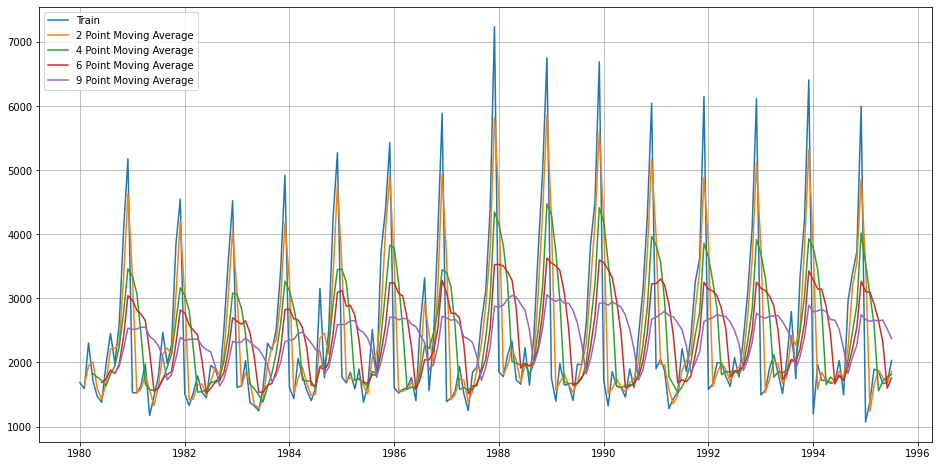

In [43]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [44]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_1.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df_1.index.year >= 1991]


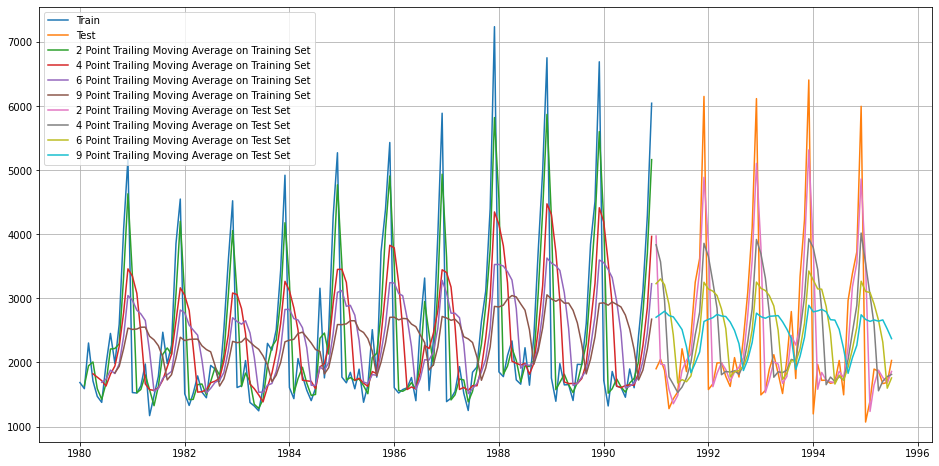

In [45]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [46]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [47]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [48]:
#Simple Exponential Smoothing
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
model_SES_autofit = model_SES.fit(optimized=True)

In [50]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2403.785622
1991-02-01    2403.785622
1991-03-01    2403.785622
1991-04-01    2403.785622
1991-05-01    2403.785622
1991-06-01    2403.785622
1991-07-01    2403.785622
1991-08-01    2403.785622
1991-09-01    2403.785622
1991-10-01    2403.785622
1991-11-01    2403.785622
1991-12-01    2403.785622
1992-01-01    2403.785622
1992-02-01    2403.785622
1992-03-01    2403.785622
1992-04-01    2403.785622
1992-05-01    2403.785622
1992-06-01    2403.785622
1992-07-01    2403.785622
1992-08-01    2403.785622
1992-09-01    2403.785622
1992-10-01    2403.785622
1992-11-01    2403.785622
1992-12-01    2403.785622
1993-01-01    2403.785622
1993-02-01    2403.785622
1993-03-01    2403.785622
1993-04-01    2403.785622
1993-05-01    2403.785622
1993-06-01    2403.785622
1993-07-01    2403.785622
1993-08-01    2403.785622
1993-09-01    2403.785622
1993-10-01    2403.785622
1993-11-01    2403.785622
1993-12-01    2403.785622
1994-01-01    2403.785622
1994-02-01    2403.785622
1994-03-01  

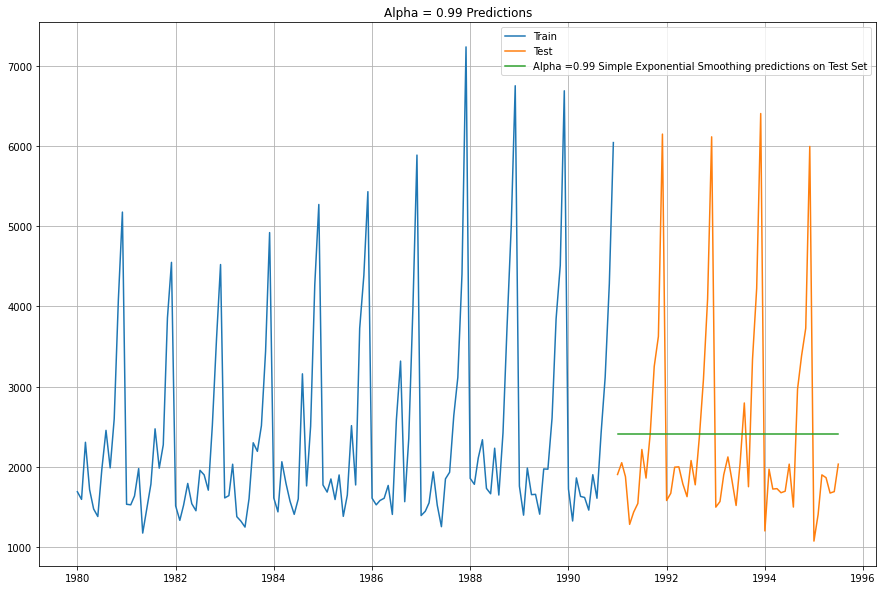

In [52]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [53]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [54]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1275.0818230401253
SES RMSE (calculated using statsmodels): 1275.0818230401253


In [55]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf



,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823


In [56]:
#Double Exponential Smoothing
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)



==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6477924009906908, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.083776800016, 'initial_slope': 27.059653074962753, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5281.439591
1991-02-01    5308.499244
1991-03-01    5335.558897
1991-04-01    5362.618550
1991-05-01    5389.678203
1991-06-01    5416.737856
1991-07-01    5443.797509
1991-08-01    5470.857163
1991-09-01    5497.916816
1991-10-01    5524.976469
1991-11-01    5552.036122
1991-12-01    5579.095775
1992-01-01    5606.155428
1992-02-01    5633.215081
1992-03-01    5660.274734
1992-04-01    5687.334387
1992-05-01    5714.394040
1992-06-01    5741.453693
1992-07-01    5768.513346
1992-08-01    5795.572999
1992-09-01    5822.632652
1992-10-01    5849.692306
1992-11-01    5876.751959
1992-12-01    5903.811612
1993-01-01    5930.871265
1993-02-01    5957.930918
1993-03-01    5984.990571
1993-04-01    6012.050224
1993-05-01    6039.109877
1993-06-01    6066.169530
1993-07-01    6093.229183
1993-08-01    6120.288836
1993-09-01    6147.348489
1993-10-01    6174.408142
1993-11-01    6201.467796
1993-12-01    6228.527449
1994-01-01    6255.587102
1994-02-01    6282.646755
1994-03-01  

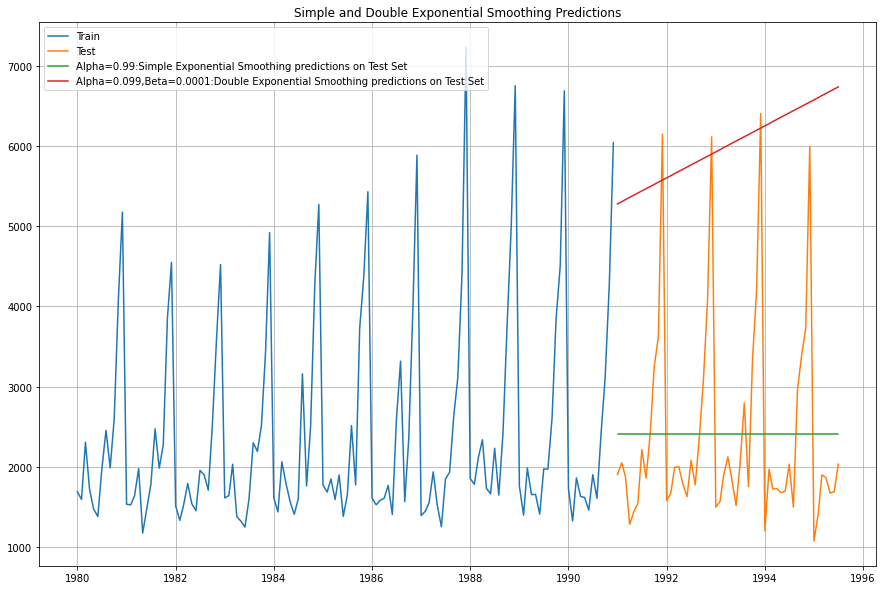

In [58]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [59]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3850.98979591091


In [60]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796


In [61]:
#Holt Winter's linear method
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08621976457712728, 'smoothing_slope': 1.3722820308989836e-08, 'smoothing_seasonal': 0.4763668704627969, 'damping_slope': nan, 'initial_level': 1684.7567371537205, 'initial_slope': 0.00663980720702693, 'initial_seasons': array([  39.19865194,  -37.26225944,  465.11612145,  205.83244815,
       -140.69775927, -156.92133674,  338.06682948,  856.76977123,
        403.45669741,  971.24810067, 2401.69439277, 3426.88784686]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [62]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1532.422201
1991-02-01    1241.380627
1991-03-01    1726.781065
1991-04-01    1584.320418
1991-05-01    1494.023217
1991-06-01    1311.482575
1991-07-01    1834.869601
1991-08-01    1696.165162
1991-09-01    2338.935039
1991-10-01    3249.314080
1991-11-01    4324.466708
1991-12-01    6461.432300
1992-01-01    1532.501875
1992-02-01    1241.460301
1992-03-01    1726.860738
1992-04-01    1584.400091
1992-05-01    1494.102890
1992-06-01    1311.562249
1992-07-01    1834.949275
1992-08-01    1696.244836
1992-09-01    2339.014713
1992-10-01    3249.393753
1992-11-01    4324.546381
1992-12-01    6461.511973
1993-01-01    1532.581549
1993-02-01    1241.539975
1993-03-01    1726.940412
1993-04-01    1584.479765
1993-05-01    1494.182564
1993-06-01    1311.641922
1993-07-01    1835.028949
1993-08-01    1696.324510
1993-09-01    2339.094387
1993-10-01    3249.473427
1993-11-01    4324.626055
1993-12-01    6461.591647
1994-01-01    1532.661222
1994-02-01    1241.619648
1994-03-01  

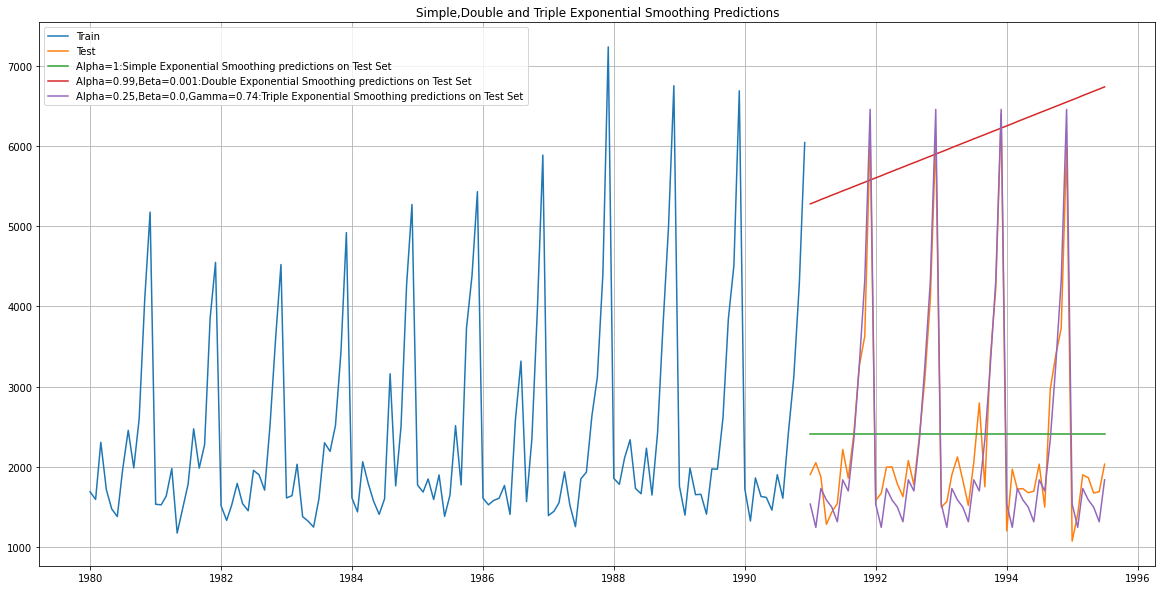

In [63]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(20,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [64]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 362.7326152453809


In [65]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


In [66]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15420626100710186, 'smoothing_slope': 5.31004588730174e-21, 'smoothing_seasonal': 0.3713228125445634, 'damping_slope': nan, 'initial_level': 1639.99933972618, 'initial_slope': 4.847695527861546, 'initial_seasons': array([1.00842978, 0.96899514, 1.24181168, 1.13206716, 0.93979295,
       0.93811177, 1.22457951, 1.54428109, 1.27335495, 1.631977  ,
       2.48292059, 3.11861503]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [67]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1602.194523
1991-02-01    1373.889119
1991-03-01    1807.439476
1991-04-01    1704.573982
1991-05-01    1602.374672
1991-06-01    1415.479577
1991-07-01    1944.852634
1991-08-01    1910.059979
1991-09-01    2435.190322
1991-10-01    3333.449555
1991-11-01    4407.775852
1991-12-01    6328.534082
1992-01-01    1656.058224
1992-02-01    1419.948452
1992-03-01    1867.864677
1992-04-01    1761.401928
1992-05-01    1655.647443
1992-06-01    1462.408790
1992-07-01    2009.155172
1992-08-01    1973.038649
1992-09-01    2515.263621
1992-10-01    3442.759657
1992-11-01    4551.921241
1992-12-01    6534.930637
1993-01-01    1709.921926
1993-02-01    1466.007784
1993-03-01    1928.289878
1993-04-01    1818.229874
1993-05-01    1708.920214
1993-06-01    1509.338003
1993-07-01    2073.457711
1993-08-01    2036.017319
1993-09-01    2595.336921
1993-10-01    3552.069759
1993-11-01    4696.066631
1993-12-01    6741.327192
1994-01-01    1763.785628
1994-02-01    1512.067116
1994-03-01  

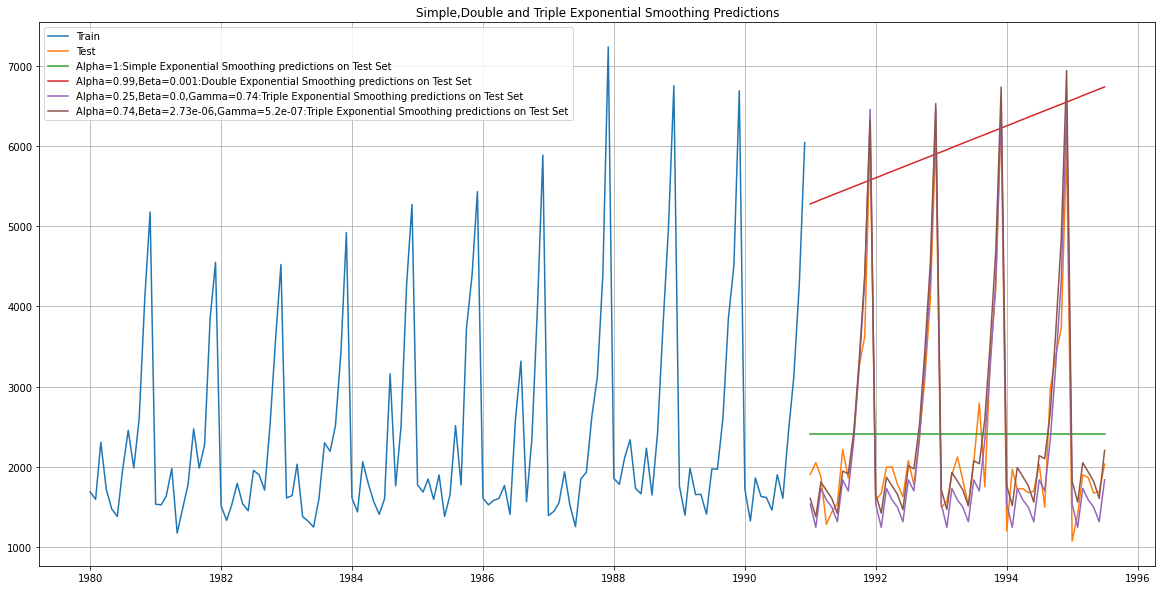

In [68]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(20,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [69]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 383.15762696185453


In [70]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [71]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

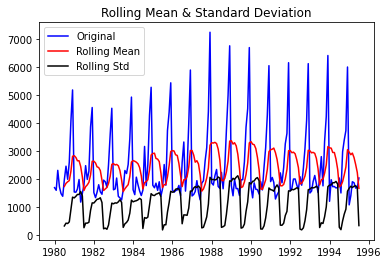

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [72]:
test_stationarity(df_1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

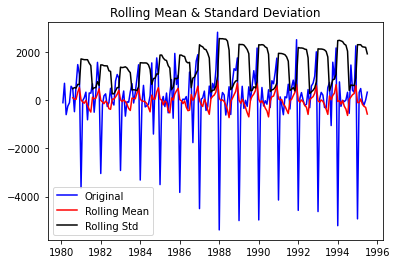

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [73]:
test_stationarity(df_1['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

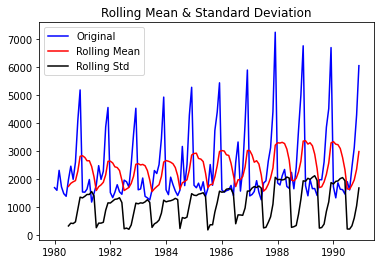

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [74]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05.

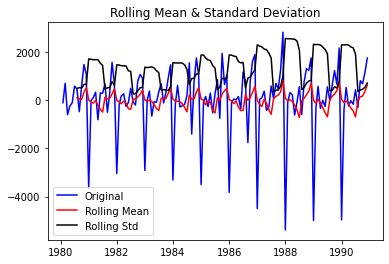

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [75]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria(AIC) on the training data and evaluate this model on the test data using RMSE.

In [76]:
# combination of different parameters of p and q in the range of 0 and 2
# kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [77]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [78]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.0139453494457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(1, 1, 2) - AIC:2233.5976471189274
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.360489886391
ARIMA(2, 1, 2) - AIC:2210.6189875760692


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [79]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.618988
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [80]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.929
Date:                Tue, 23 Feb 2021   AIC                           2210.619
Time:                        01:55:05   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.629
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.806      0.000       4.572       6.598
ar.L1.D.Sparkling     1.2699      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [81]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [82]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.484105408576


In [83]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

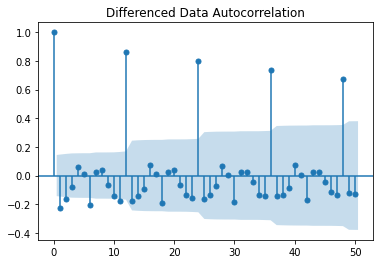

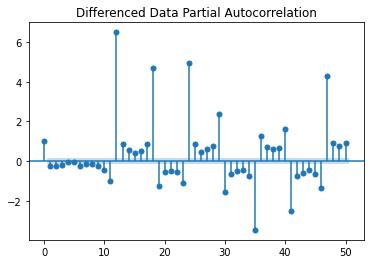

In [84]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [85]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Tue, 23 Feb 2021   AIC                           2269.583
Time:                        01:55:08   BIC                           2275.333
Sample:                    02-01-1980   HQIC                          2271.919
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [86]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [87]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [88]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


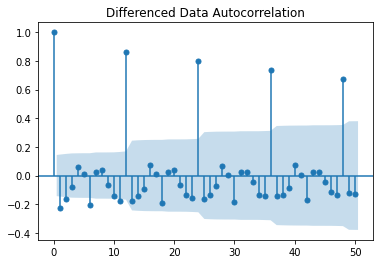

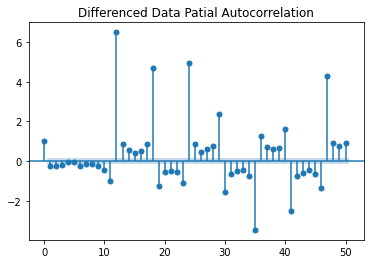

In [91]:
#SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

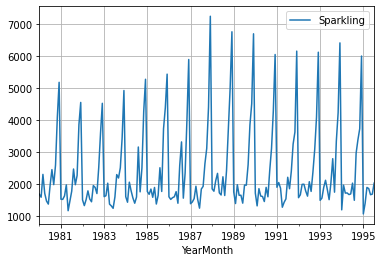

In [93]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

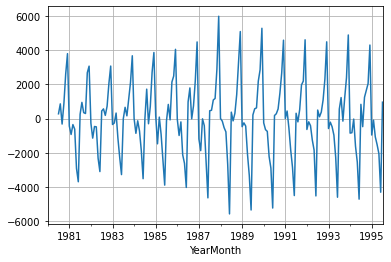

In [94]:
(df_1['Sparkling'].diff(6)).plot()
plt.grid();

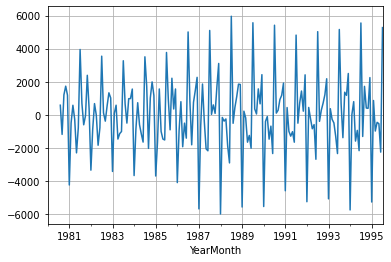

In [95]:
(df_1['Sparkling'].diff(6)).diff().plot()
plt.grid();

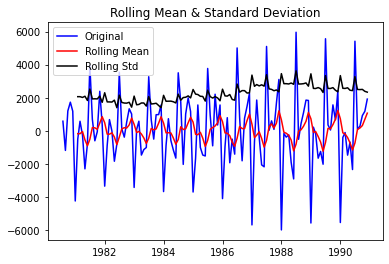

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [96]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

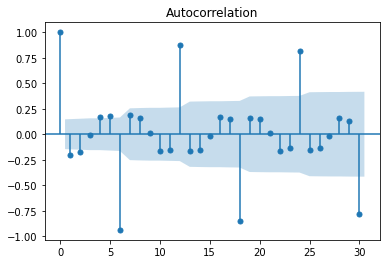

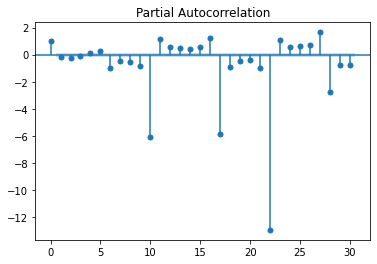

In [97]:
#Checking the ACF and the PACF plots for the new modified Time Series.

plot_acf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.

In [98]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -811.726
Date:                                   Tue, 23 Feb 2021   AIC                           1633.452
Time:                                           02:15:28   BIC                           1646.770
Sample:                                                0   HQIC                          1638.850
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0176      0.015    -68.708      0.000    

<Figure size 1440x720 with 0 Axes>

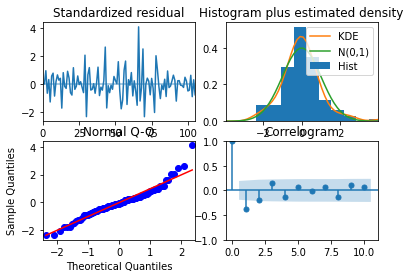

In [105]:
plt.figure(figsize=(20,10))

results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [106]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [107]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,907.137553,510.698106,-93.812343,1908.087448
1,529.684484,722.235472,-885.871030,1945.239998
2,1125.346192,884.553898,-608.347590,2859.039975
3,933.621499,1021.394693,-1068.275314,2935.518312
4,743.285523,1141.953870,-1494.902934,2981.473980


In [108]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1915.6418601704008


In [110]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


9.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [111]:
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.99,SES",1275.081823
"Alpha=1,Beta=0.0189:DES",3850.989796
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.732615


10.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [113]:
#Building the most optimum model on the Full Data.

full_data_model = sm.tsa.statespace.SARIMAX(df_1['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood               -1231.230
Date:                                   Tue, 23 Feb 2021   AIC                           2472.460
Time:                                           02:23:15   BIC                           2487.867
Sample:                                       01-01-1980   HQIC                          2478.716
                                            - 07-01-1995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0067      0.011    -90.316      0.000    

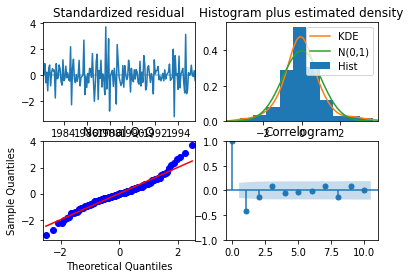

In [114]:
results_full_data_model.plot_diagnostics();

In [115]:
#Evaluate the model on the whole and predict 12 months into the future
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [116]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1880.265046,503.379578,893.659202,2866.870889
1995-09-01,2438.694262,711.886226,1043.422897,3833.965626
1995-10-01,3291.427573,871.879005,1582.576125,5000.279021
1995-11-01,3974.569976,1006.759156,2001.358290,5947.781663
1995-12-01,6196.046847,1125.590955,3989.929114,8402.164580


In [117]:
rmse = mean_squared_error(df_1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 633.9106281374608


In [118]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

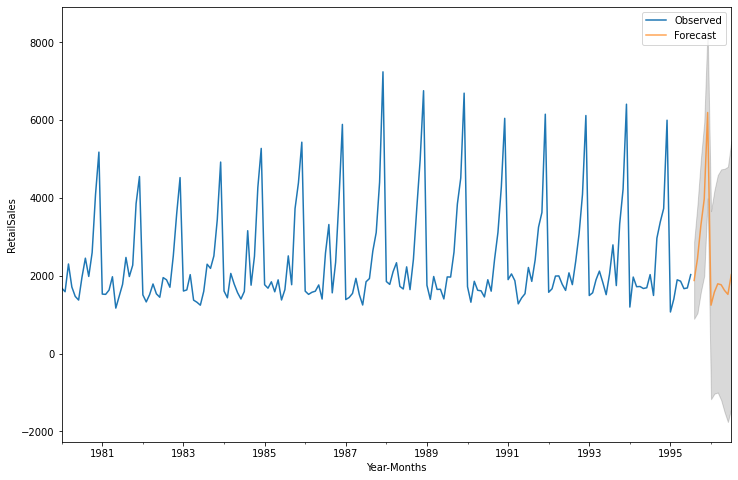

In [123]:
# plot the forecast along with the confidence band
plt.figure(figsize=((12,8)))
axis = df_1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()